In [1]:
%autosave 60
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
import random
import matplotlib.pyplot as plt
import glob
import os
from matplotlib.image import imread
import skimage

Autosaving every 60 seconds


Using MXNet backend


### load the fruit dataset

In [2]:
#load the training data
x_train = list()
y_train = list()
for img_dir_path in glob.glob('../Fruit360/fruits-360/Training/*'):
    train_label = img_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(img_dir_path, "*.jpg")):
        image = imread(image_path)
        x_train.append(image)
        y_train.append(train_label)

In [3]:
#convert the data type from list to numpy array
#and 
x_train = np.array(x_train)
x_train = x_train.transpose(0,3,1,2)
y_train = np.array(y_train)
print("x_train is a numpy array of size:", np.shape(x_train))
print("y_train is a numpy array of size:", np.shape(y_train))

x_train is a numpy array of size: (48905, 3, 100, 100)
y_train is a numpy array of size: (48905,)


In [4]:
#load the test data
x_test = list()
y_test = list()
for img_dir_path in glob.glob('../Fruit360/fruits-360/Test/*'):
    test_label = img_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(img_dir_path, "*.jpg")):
        image = imread(image_path)
        x_test.append(image)
        y_test.append(test_label)

In [5]:
#convert the data type from list to numpy array
x_test = np.array(x_test)
x_test = x_test.transpose(0,3,1,2)
y_test = np.array(y_test)
print("x_test is a numpy array of size:", np.shape(x_test))
print("y_test is a numpy array of size:", np.shape(y_test))

x_test is a numpy array of size: (16421, 3, 100, 100)
y_test is a numpy array of size: (16421,)


In [6]:
x_train = x_train/255
x_test = x_test/255

### Gaussian-distributed additive noise

In [7]:
x_train_noise_gaussian = skimage.util.random_noise(x_train, mode='gaussian', seed=None, clip=True)
x_test_noise_gaussian = skimage.util.random_noise(x_test, mode='gaussian', seed=None, clip=True)

In [8]:
x_train_noise_gaussian_flatten = x_train_noise_gaussian.reshape(48905,30000)
x_test_noise_gaussian_flatten = x_test_noise_gaussian.reshape(16421,30000)

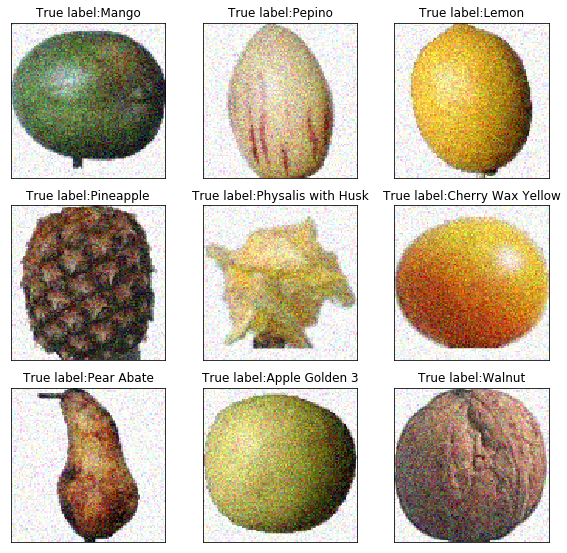

In [9]:
index_lst = [random.randint(0,16421) for i in range(9)]

plt.clf()
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

for i in range(9):
    plt.subplot(3, 3, i+1);
    plt.tight_layout()
    index = index_lst[i]
    image = x_train_noise_gaussian[index]
    plt.imshow(image.transpose(1,2,0))
    name = y_train[index]
    plt.title("True label:{}".format(name))
    plt.xticks([])
    plt.yticks([])
fig

In [67]:
%%time
random_forest = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest.fit(x_train_noise_gaussian_flatten, y_train)
rf_noise_gaussian = random_forest.score(x_test_noise_gaussian_flatten, y_test)
print("The accuracy of random forest on test data with gaussian noise is",rf_noise_gaussian)

The accuracy of random forest on test data with gaussian noise is 0.9068875220753913
CPU times: user 33min 47s, sys: 3.51 s, total: 33min 50s
Wall time: 34min 35s


### Poisson-distributed noise

In [8]:
x_train_noise_poisson = skimage.util.random_noise(x_train, mode='poisson', seed=None, clip=True)
x_test_noise_poisson = skimage.util.random_noise(x_test, mode='poisson', seed=None, clip=True)

In [9]:
x_train_noise_poisson_flatten = x_train_noise_poisson.reshape(48905,30000)
x_test_noise_poisson_flatten = x_test_noise_poisson.reshape(16421,30000)

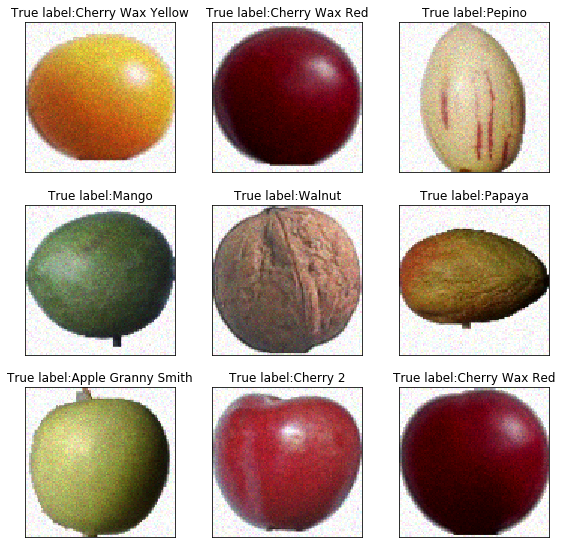

In [10]:
index_lst = [random.randint(0,16421) for i in range(9)]

plt.clf()
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

for i in range(9):
    plt.subplot(3, 3, i+1);
    plt.tight_layout()
    index = index_lst[i]
    image = x_train_noise_poisson[index]
    plt.imshow(image.transpose(1,2,0))
    name = y_train[index]
    plt.title("True label:{}".format(name))
    plt.xticks([])
    plt.yticks([])
fig

In [72]:
%%time
random_forest = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest.fit(x_train_noise_poisson_flatten, y_train)
rf_noise_gaussian = random_forest.score(x_test_noise_poisson_flatten, y_test)
print("The accuracy of random forest on test data with gaussian noise is",rf_noise_gaussian)

The accuracy of random forest on test data with gaussian noise is 0.9593203824371231
CPU times: user 11min 12s, sys: 6.74 s, total: 11min 19s
Wall time: 11min 19s


### ‘salt’ Replaces random pixels with 1

In [7]:
x_train_noise_salt = skimage.util.random_noise(x_train, mode='salt', seed=None, clip=True)
x_test_noise_salt = skimage.util.random_noise(x_test, mode='salt', seed=None, clip=True)

In [8]:
x_train_salt_flatten = x_train_noise_salt.reshape(48905,30000)
x_test_salt_flatten = x_test_noise_salt.reshape(16421,30000)

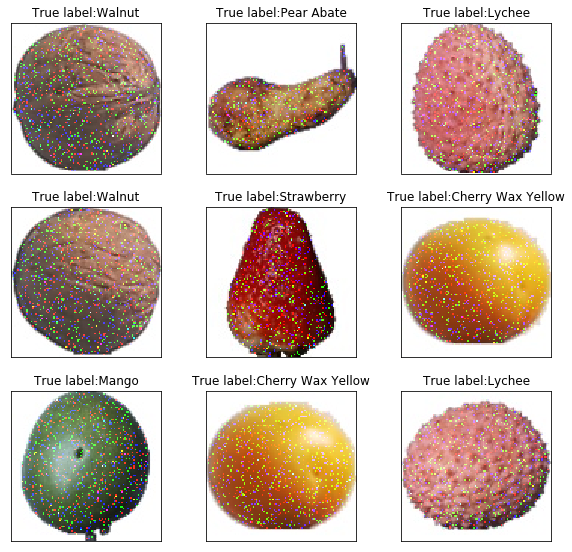

In [9]:
index_lst = [random.randint(0,16421) for i in range(9)]

plt.clf()
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

for i in range(9):
    plt.subplot(3, 3, i+1);
    plt.tight_layout()
    index = index_lst[i]
    image = x_train_noise_salt[index]
    plt.imshow(image.transpose(1,2,0))
    name = y_train[index]
    plt.title("True label:{}".format(name))
    plt.xticks([])
    plt.yticks([])
fig

In [58]:
%%time
random_forest = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest.fit(x_train_salt_flatten, y_train)
rf_noise_salt_score = random_forest.score(x_test_salt_flatten, y_test)
print("The accuracy of random forest on test data with salt noise is",rf_noise_salt_score)

The accuracy of random forest on test data with salt noise is 0.9642530905547774
CPU times: user 9min 47s, sys: 2.23 s, total: 9min 49s
Wall time: 9min 49s


### ‘pepper’ Replaces random pixels with 0

In [7]:
x_train_noise_pepper = skimage.util.random_noise(x_train, mode='pepper', seed=None, clip=True)
x_test_noise_pepper = skimage.util.random_noise(x_test, mode='pepper', seed=None, clip=True)

In [8]:
x_train_pepper_flatten = x_train_noise_pepper.reshape(48905,30000)
x_test_pepper_flatten = x_test_noise_pepper.reshape(16421,30000)

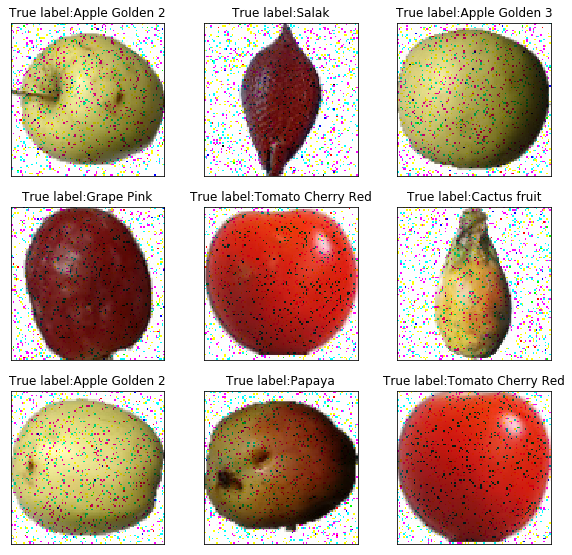

In [9]:
index_lst = [random.randint(0,16421) for i in range(9)]

plt.clf()
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

for i in range(9):
    plt.subplot(3, 3, i+1);
    plt.tight_layout()
    index = index_lst[i]
    image = x_train_noise_pepper[index]
    plt.imshow(image.transpose(1,2,0))
    name = y_train[index]
    plt.title("True label:{}".format(name))
    plt.xticks([])
    plt.yticks([])
fig

In [55]:
%%time
random_forest = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest.fit(x_train_pepper_flatten, y_train)
rf_noise_pepper_score = random_forest.score(x_test_pepper_flatten, y_test)
print("The accuracy of random forest on test data with pepper noise is",rf_noise_pepper_score)

The accuracy of random forest on test data with pepper noise is 0.9573107606114122
CPU times: user 9min 32s, sys: 2.49 s, total: 9min 35s
Wall time: 9min 34s


In [15]:
print(np.shape(x_train_noise_gaussian))
print(np.shape(x_test_noise_gaussian))

(48905, 3, 100, 100)
(16421, 3, 100, 100)


### visualization of added noise

Banana Red


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


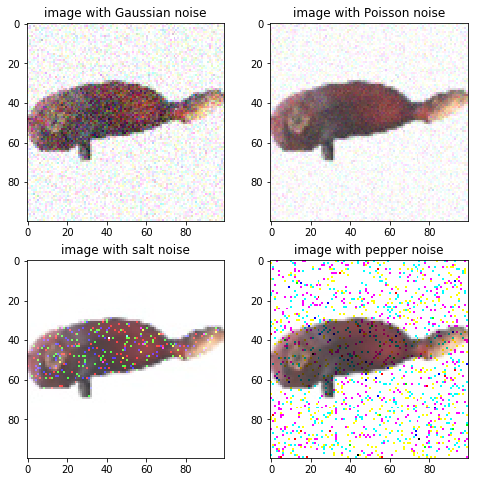

In [54]:
num = random.randint(0,16421)
print(y_test[num])

plt.clf()
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.subplot(2, 2, 1);
gaussian_noise = x_test_noise_gaussian[num].reshape(3,100,100)
plt.imshow(gaussian_noise.transpose(1,2,0))
plt.title('image with Gaussian noise')
#display the same image after dimensionality reduction 
plt.subplot(2, 2, 2); 
poisson_noise = x_test_noise_poisson[num].reshape(3,100,100)
plt.imshow(poisson_noise.transpose(1,2,0))
plt.title('image with Poisson noise')
plt.subplot(2, 2, 3);
salt_noise = x_test_noise_salt[num].reshape(3,100,100)
plt.imshow(salt_noise.transpose(1,2,0))
plt.title('image with salt noise')
#display the same image after dimensionality reduction 
plt.subplot(2, 2, 4); 
pepper_noise = x_test_noise_pepper[num].reshape(3,100,100)
plt.imshow(pepper_noise.transpose(1,2,0))
plt.title('image with pepper noise')

fig

### convolutional autoencoder with gaussian noise

In [63]:
#construct convolutional autoencoder
input_img = Input(shape=(3, 100, 100))
x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_conv = Model(input_img, decoded)
autoencoder_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 100, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 100, 100)     7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 50, 50)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 50, 50)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 25, 25)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 25, 25)       295168    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 256, 50, 50)       0         
__________

In [64]:
autoencoder_conv.compile(optimizer='adadelta', loss='mean_absolute_error')
autoencoder_conv.fit(x_train_noise_gaussian, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_noise_gaussian, x_test))

Train on 48905 samples, validate on 16421 samples
Epoch 1/10


/usr/local/src/incubator-mxnet/python/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.015625). Is this intended?
  force_init=force_init)


48905/48905 [==============================] - 164s 3ms/step - loss: 0.0931 - val_loss: 0.0404
Epoch 2/10
48905/48905 [==============================] - 157s 3ms/step - loss: 0.0425 - val_loss: 0.0344
Epoch 3/10
48905/48905 [==============================] - 157s 3ms/step - loss: 0.0333 - val_loss: 0.0301
Epoch 4/10
48905/48905 [==============================] - 157s 3ms/step - loss: 0.0286 - val_loss: 0.0250
Epoch 5/10
48905/48905 [==============================] - 157s 3ms/step - loss: 0.0261 - val_loss: 0.0227
Epoch 6/10
48905/48905 [==============================] - 157s 3ms/step - loss: 0.0247 - val_loss: 0.0245
Epoch 7/10
48905/48905 [==============================] - 157s 3ms/step - loss: 0.0236 - val_loss: 0.0208
Epoch 8/10
48905/48905 [==============================] - 157s 3ms/step - loss: 0.0227 - val_loss: 0.0209
Epoch 9/10
48905/48905 [==============================] - 142s 3ms/step - loss: 0.0221 - val_loss: 0.0203
Epoch 10/10
48905/48905 [==============================] 

In [67]:
x_train_denoise_gaussian = autoencoder_conv.predict(x_train_noise_gaussian)
x_test_denoise_gaussian = autoencoder_conv.predict(x_test_noise_gaussian)

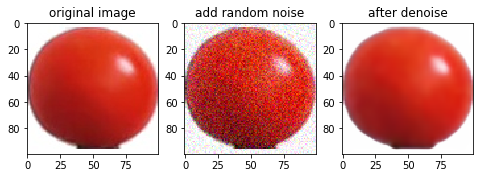

In [36]:
num = random.randint(0,10000)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.subplot(1, 3, 1);
sample = x_test[num].reshape(3, 100,100)
plt.imshow(sample.transpose(1,2,0))
plt.title('original image')
#display the same image after dimensionality reduction 
plt.subplot(1, 3, 2);
sample_noise = x_test_noise_gaussian[num].reshape(3, 100,100)
plt.imshow(sample_noise.transpose(1,2,0))
plt.title('add random noise')
plt.subplot(1, 3, 3);
sample_denoise = x_test_denoise_gaussian[num].reshape(3, 100,100)
plt.imshow(sample_denoise.transpose(1,2,0))
plt.title('after denoise')
#plt.show()
fig

In [68]:
x_train_denoise_gaussian_flatten = x_train_denoise_gaussian.reshape(48905,30000)
x_test_denoise_gaussian_flatten = x_test_denoise_gaussian.reshape(16421,30000)

In [21]:
%%time
random_forest_AE = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest_AE.fit(x_train_denoise_gaussian_flatten, y_train)
rf_noise_gaussian_AE = random_forest_AE.score(x_test_denoise_gaussian_flatten, y_test)
print("The accuracy of random forest on test data with gaussian noise is",rf_noise_gaussian_AE)

The accuracy of random forest on test data with gaussian noise is 0.9707691370805676
CPU times: user 44min 3s, sys: 11.4 s, total: 44min 15s
Wall time: 56min 22s


In [69]:
x_train_gaussian = autoencoder_conv.predict(x_train)
x_test_gaussian = autoencoder_conv.predict(x_test)

In [71]:
%%time
random_forest_AE_2 = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest_AE_2.fit(x_train_gaussian.reshape(48905,30000), y_train)
rf_noise_gaussian_AE_2 = random_forest_AE_2.score(x_test_gaussian.reshape(16421,30000), y_test)
print("The accuracy of random forest on test data is",rf_noise_gaussian_AE_2)

The accuracy of random forest on test data is 0.969307593934596
CPU times: user 28min 36s, sys: 2.49 s, total: 28min 39s
Wall time: 28min 38s


### convolutional autoencoder with poisson noise

In [11]:
#construct convolutional autoencoder
input_img = Input(shape=(3, 100, 100))
x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_poisson = Model(input_img, decoded)
autoencoder_poisson.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 100, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 100, 100)     7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 50, 50)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 50, 50)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 25, 25)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 25, 25)       295168    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 256, 50, 50)       0         
__________

In [12]:
autoencoder_poisson.compile(optimizer='adadelta', loss='mean_absolute_error')
autoencoder_poisson.fit(x_train_noise_poisson, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_noise_poisson, x_test))

Train on 48905 samples, validate on 16421 samples
Epoch 1/10


/usr/local/src/incubator-mxnet/python/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.015625). Is this intended?
  force_init=force_init)


48905/48905 [==============================] - 165s 3ms/step - loss: 0.0938 - val_loss: 0.0407
Epoch 2/10
48905/48905 [==============================] - 160s 3ms/step - loss: 0.0425 - val_loss: 0.0347
Epoch 3/10
48905/48905 [==============================] - 159s 3ms/step - loss: 0.0327 - val_loss: 0.0345
Epoch 4/10
48905/48905 [==============================] - 159s 3ms/step - loss: 0.0279 - val_loss: 0.0234
Epoch 5/10
48905/48905 [==============================] - 159s 3ms/step - loss: 0.0255 - val_loss: 0.0219
Epoch 6/10
48905/48905 [==============================] - 159s 3ms/step - loss: 0.0238 - val_loss: 0.0229
Epoch 7/10
48905/48905 [==============================] - 159s 3ms/step - loss: 0.0226 - val_loss: 0.0213
Epoch 8/10
48905/48905 [==============================] - 159s 3ms/step - loss: 0.0218 - val_loss: 0.0211
Epoch 9/10
48905/48905 [==============================] - 159s 3ms/step - loss: 0.0208 - val_loss: 0.0211
Epoch 10/10
48905/48905 [==============================] 

In [19]:
x_train_denoise_poisson = autoencoder_poisson.predict(x_train_noise_poisson)
x_test_denoise_poisson = autoencoder_poisson.predict(x_test_noise_poisson)

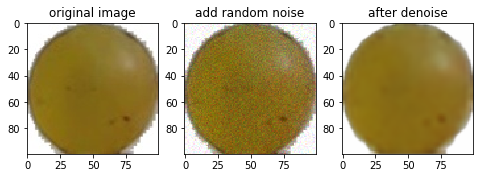

In [20]:
num = random.randint(0,10000)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.subplot(1, 3, 1);
sample = x_test[num].reshape(3, 100,100)
plt.imshow(sample.transpose(1,2,0))
plt.title('original image')
#display the same image after dimensionality reduction 
plt.subplot(1, 3, 2);
sample_noise = x_test_noise_poisson[num].reshape(3, 100,100)
plt.imshow(sample_noise.transpose(1,2,0))
plt.title('add random noise')
plt.subplot(1, 3, 3);
sample_denoise = x_test_denoise_poisson[num].reshape(3, 100,100)
plt.imshow(sample_denoise.transpose(1,2,0))
plt.title('after denoise')
#plt.show()
fig

In [21]:
x_train_denoise_poisson_flatten = x_train_denoise_poisson.reshape(48905,30000)
x_test_denoise_poisson_flatten = x_test_denoise_poisson.reshape(16421,30000)

In [22]:
%%time
random_forest_poisson_AE = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest_poisson_AE.fit(x_train_denoise_poisson_flatten, y_train)
rf_noise_poisson_AE = random_forest_poisson_AE.score(x_test_denoise_poisson_flatten, y_test)
print("The accuracy of random forest on test data with poisson noise is",rf_noise_poisson_AE)

The accuracy of random forest on test data with poisson noise is 0.9735095304792644
CPU times: user 47min 46s, sys: 9.12 s, total: 47min 55s
Wall time: 1h 23s


In [13]:
x_train_poisson = autoencoder_poisson.predict(x_train)
x_test_poisson = autoencoder_poisson.predict(x_test)

In [15]:
%%time
random_forest_poisson_AE_2 = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest_poisson_AE_2.fit(x_train_poisson.reshape(48905,30000), y_train)
rf_noise_poisson_AE_2 = random_forest_poisson_AE_2.score(x_test_poisson.reshape(16421,30000), y_test)
print("The accuracy of random forest on test data is",rf_noise_poisson_AE_2)

The accuracy of random forest on test data is 0.9688813105170209
CPU times: user 29min 41s, sys: 1.62 s, total: 29min 43s
Wall time: 29min 42s


### convolutional autoencoder with salt noise

In [10]:
#construct convolutional autoencoder
input_img = Input(shape=(3, 100, 100))
x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_salt = Model(input_img, decoded)
autoencoder_salt.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 100, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 100, 100)     7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 50, 50)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 50, 50)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 25, 25)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 25, 25)       295168    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 256, 50, 50)       0         
__________

In [11]:
autoencoder_salt.compile(optimizer='adadelta', loss='mean_absolute_error')
autoencoder_salt.fit(x_train_noise_salt, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_noise_salt, x_test))

Train on 48905 samples, validate on 16421 samples
Epoch 1/10


/usr/local/src/incubator-mxnet/python/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.015625). Is this intended?
  force_init=force_init)


48905/48905 [==============================] - 128s 3ms/step - loss: 0.0950 - val_loss: 0.0506
Epoch 2/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0434 - val_loss: 0.0381
Epoch 3/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0339 - val_loss: 0.0300
Epoch 4/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0296 - val_loss: 0.0248
Epoch 5/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0264 - val_loss: 0.0245
Epoch 6/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0245 - val_loss: 0.0200
Epoch 7/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0231 - val_loss: 0.0205
Epoch 8/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0223 - val_loss: 0.0210
Epoch 9/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0215 - val_loss: 0.0217
Epoch 10/10
48905/48905 [==============================] 

In [12]:
x_train_denoise_salt = autoencoder_salt.predict(x_train_noise_salt)
x_test_denoise_salt = autoencoder_salt.predict(x_test_noise_salt)

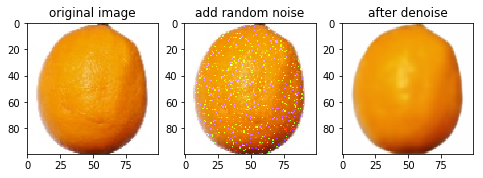

In [13]:
num = random.randint(0,10000)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.subplot(1, 3, 1);
sample = x_test[num].reshape(3, 100,100)
plt.imshow(sample.transpose(1,2,0))
plt.title('original image')
#display the same image after dimensionality reduction 
plt.subplot(1, 3, 2);
sample_noise = x_test_noise_salt[num].reshape(3, 100,100)
plt.imshow(sample_noise.transpose(1,2,0))
plt.title('add random noise')
plt.subplot(1, 3, 3);
sample_denoise = x_test_denoise_salt[num].reshape(3, 100,100)
plt.imshow(sample_denoise.transpose(1,2,0))
plt.title('after denoise')
#plt.show()
fig

In [15]:
x_train_denoise_salt_flatten = x_train_denoise_salt.reshape(48905,30000)
x_test_denoise_salt_flatten = x_test_denoise_salt.reshape(16421,30000)

In [16]:
%%time
random_forest_salt_AE = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest_salt_AE.fit(x_train_denoise_salt_flatten, y_train)
rf_noise_salt_AE = random_forest_salt_AE.score(x_test_denoise_salt_flatten, y_test)
print("The accuracy of random forest on test data with salt noise is",rf_noise_salt_AE)

The accuracy of random forest on test data with salt noise is 0.9721088849643749
CPU times: user 44min 56s, sys: 4.81 s, total: 45min 1s
Wall time: 2h 9s


In [14]:
x_train_salt = autoencoder_salt.predict(x_train)
x_test_salt = autoencoder_salt.predict(x_test)

In [15]:
%%time
random_forest_salt_AE_2 = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest_salt_AE_2.fit(x_train_salt.reshape(48905,30000), y_train)
rf_noise_salt_AE_2 = random_forest_salt_AE_2.score(x_test_salt.reshape(16421,30000), y_test)
print("The accuracy of random forest on test data is",rf_noise_salt_AE_2)

The accuracy of random forest on test data is 0.9695511844589245
CPU times: user 29min 21s, sys: 1.84 s, total: 29min 23s
Wall time: 29min 20s


### convolutional autoencoder with pepper noise

In [10]:
#construct convolutional autoencoder
input_img = Input(shape=(3, 100, 100))
x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_pepper = Model(input_img, decoded)
autoencoder_pepper.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 100, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 100, 100)     7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 50, 50)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 50, 50)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 25, 25)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 25, 25)       295168    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 256, 50, 50)       0         
__________

In [11]:
autoencoder_pepper.compile(optimizer='adadelta', loss='mean_absolute_error')
autoencoder_pepper.fit(x_train_noise_pepper, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_noise_pepper, x_test))

Train on 48905 samples, validate on 16421 samples
Epoch 1/10


/usr/local/src/incubator-mxnet/python/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.015625). Is this intended?
  force_init=force_init)


48905/48905 [==============================] - 128s 3ms/step - loss: 0.0897 - val_loss: 0.0425
Epoch 2/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0412 - val_loss: 0.0391
Epoch 3/10
48905/48905 [==============================] - 122s 3ms/step - loss: 0.0321 - val_loss: 0.0242
Epoch 4/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0281 - val_loss: 0.0260
Epoch 5/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0257 - val_loss: 0.0216
Epoch 6/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0239 - val_loss: 0.0221
Epoch 7/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0229 - val_loss: 0.0193
Epoch 8/10
48905/48905 [==============================] - 122s 3ms/step - loss: 0.0221 - val_loss: 0.0195
Epoch 9/10
48905/48905 [==============================] - 123s 3ms/step - loss: 0.0214 - val_loss: 0.0188
Epoch 10/10
48905/48905 [==============================] 

In [12]:
x_train_denoise_pepper = autoencoder_pepper.predict(x_train_noise_pepper)
x_test_denoise_pepper = autoencoder_pepper.predict(x_test_noise_pepper)

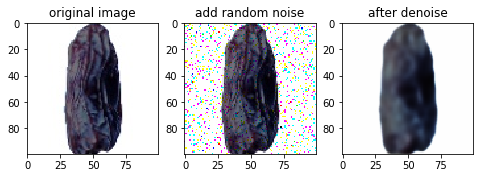

In [13]:
num = random.randint(0,10000)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.subplot(1, 3, 1);
sample = x_test[num].reshape(3, 100,100)
plt.imshow(sample.transpose(1,2,0))
plt.title('original image')
#display the same image after dimensionality reduction 
plt.subplot(1, 3, 2);
sample_noise = x_test_noise_pepper[num].reshape(3, 100,100)
plt.imshow(sample_noise.transpose(1,2,0))
plt.title('add random noise')
plt.subplot(1, 3, 3);
sample_denoise = x_test_denoise_pepper[num].reshape(3, 100,100)
plt.imshow(sample_denoise.transpose(1,2,0))
plt.title('after denoise')
#plt.show()
fig

In [15]:
x_train_denoise_pepper_flatten = x_train_denoise_pepper.reshape(48905,30000)
x_test_denoise_pepper_flatten = x_test_denoise_pepper.reshape(16421,30000)

In [16]:
%%time
random_forest_pepper_AE = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest_pepper_AE.fit(x_train_denoise_pepper_flatten, y_train)
rf_noise_pepper_AE = random_forest_pepper_AE.score(x_test_denoise_pepper_flatten, y_test)
print("The accuracy of random forest on test data with pepper noise is",rf_noise_pepper_AE)

The accuracy of random forest on test data with pepper noise is 0.9670543815845564
CPU times: user 48min 21s, sys: 22 s, total: 48min 43s
Wall time: 2h 31min 28s


In [13]:
x_train_pepper = autoencoder_pepper.predict(x_train)
x_test_pepper = autoencoder_pepper.predict(x_test)

In [14]:
%%time
random_forest_pepper_AE_2 = RandomForestClassifier(n_estimators=95,bootstrap=True)
random_forest_pepper_AE_2.fit(x_train_pepper.reshape(48905,30000), y_train)
rf_noise_pepper_AE_2 = random_forest_pepper_AE_2.score(x_test_pepper.reshape(16421,30000), y_test)
print("The accuracy of random forest on test data is",rf_noise_pepper_AE_2)

The accuracy of random forest on test data is 0.9658364289629133
CPU times: user 40min 53s, sys: 2.29 s, total: 40min 55s
Wall time: 40min 52s


### plot of accuracy

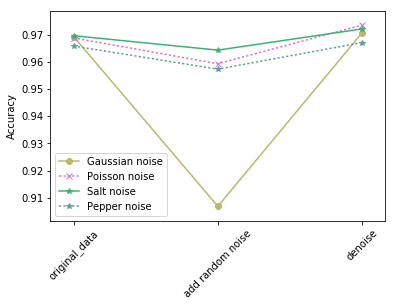

In [21]:
x_axis = ['original_data', 'add random noise', 'denoise']
x = range(len(x_axis))

gaussian_noise = [0.9693, 0.9069, 0.9707]
poisson_noise = [0.9688, 0.9593, 0.9735]
salt_noise = [0.9696, 0.9643, 0.9721]
pepper_noise = [0.9658, 0.9573, 0.9671]

plt.plot(x, gaussian_noise,color='darkkhaki',linestyle='-',marker='o',label='Gaussian noise')
plt.plot(x,poisson_noise,color='orchid',linestyle=':',marker='x',label='Poisson noise')
plt.plot(x,salt_noise,color='mediumseagreen',linestyle='-',marker='*',label='Salt noise')
plt.plot(x,pepper_noise,color='cadetblue',linestyle=':',marker='*',label='Pepper noise')

plt.xticks(x, x_axis, rotation=45)
plt.margins(0.08)
plt.subplots_adjust(bottom=0.15)
#plt.xlabel('data types')
plt.ylabel('Accuracy')
#plt.title('The plot of classification accuracies of other machine learning methods')
plt.legend()
plt.show()